<a href="https://colab.research.google.com/github/Kevinseptiyannn/Tugas-1-EDA-/blob/main/Remedial_Statmul_Metode_Manova_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install dan Import Library

In [5]:
!pip install pingouin

In [6]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.multivariate.manova import MANOVA

# MANOVA
Sebuah konsultan psikologi ingin menguji dampak penggunaan platform media sosial Tiktok dan Instagram pada kalangan mahasiswa. Untuk itu, mereka mengambil sample beberapa remaja pada suatu kampus di Tangerang. Selama sebulan, 1 kelompok pengguna aktif Tiktok, 1 kelompok pengguna aktif Instagram, dan 1 kelompok tidak aktif media sosial. Kemudian, mereka membandingkan data Tingkat Stres, Durasi Jam Tidur, dan Konsentrasi saat Belajar dari ke-3 kelompok tersebut

In [7]:
data_manova = pd.read_excel("/content/data uji remedial.xlsx", sheet_name="MANOVA")
data_manova

,Tingkat Stres,Durasi Tidur,Konsentrasi belajar,Aplikasi Medsos
0,65,7.9,76,Tidak Aktif Medsos
1,59,7.5,75,Tidak Aktif Medsos
2,63,8.0,80,Tidak Aktif Medsos
3,62,7.7,77,Tidak Aktif Medsos
4,63,7.6,74,Tidak Aktif Medsos
5,58,7.4,79,Tidak Aktif Medsos
6,60,7.9,73,Tidak Aktif Medsos
7,65,7.8,75,Tidak Aktif Medsos
8,66,7.5,81,Tidak Aktif Medsos
9,64,8.0,76,Tidak Aktif Medsos


## Uji Normalitas Multivariat

In [8]:
data_Tidak = data_manova.loc[data_manova['Aplikasi Medsos']=='Tidak Aktif Medsos', ['Tingkat Stres', 'Durasi Tidur', 'Konsentrasi belajar']]
data_Tiktok = data_manova.loc[data_manova['Aplikasi Medsos']=='Tiktok', ['Tingkat Stres', 'Durasi Tidur', 'Konsentrasi belajar']]
data_Instagram = data_manova.loc[data_manova['Aplikasi Medsos']=='Instagram', ['Tingkat Stres', 'Durasi Tidur', 'Konsentrasi belajar']]

In [9]:
print('Uji normalitas multivariat Tidak Aktif Medsos: ', pg.multivariate_normality(data_Tidak, alpha=0.05))
print('Uji normalitas multivariat Tiktok: ', pg.multivariate_normality(data_Tiktok, alpha=0.05))
print('Uji normalitas multivariat Instagram: ', pg.multivariate_normality(data_Instagram, alpha=0.05))

Uji normalitas multivariat Tidak Aktif Medsos:  HZResults(hz=np.float64(0.4010701420043422), pval=np.float64(0.8633351132311509), normal=True)
Uji normalitas multivariat Tiktok:  HZResults(hz=np.float64(0.4529585861237696), pval=np.float64(0.7284046622704589), normal=True)
Uji normalitas multivariat Instagram:  HZResults(hz=np.float64(0.49391172709097153), pval=np.float64(0.6030386094653247), normal=True)


Data tidak berdistribusi normal multivariat, sehingga kita perlu menerapkan transformasi data

In [10]:
#Transformasi
data_Tidak_trans = np.sqrt(data_Tidak)
data_Tiktok_trans = np.sqrt(data_Tiktok)
data_Instagram_trans = np.sqrt(data_Instagram)

Lalu lakukan lagi uji normalitas multivariatnya

In [11]:
data_Tidak_trans = np.log(data_Tidak)
data_Tiktok_trans = np.log(data_Tiktok)
data_Instagram_trans = np.log(data_Instagram)

## Uji Homogenitas

In [12]:
#Gabungkan lagi datanya
data_trans_manova = pd.concat([data_Tidak_trans, data_Tiktok_trans, data_Instagram_trans])
data_trans_manova['Aplikasi Medsos'] = data_manova['Aplikasi Medsos'].copy()
data_trans_manova

,Tingkat Stres,Durasi Tidur,Konsentrasi belajar,Aplikasi Medsos
0,4.174387,2.066863,4.330733,Tidak Aktif Medsos
1,4.077537,2.014903,4.317488,Tidak Aktif Medsos
2,4.143135,2.079442,4.382027,Tidak Aktif Medsos
3,4.127134,2.041220,4.343805,Tidak Aktif Medsos
4,4.143135,2.028148,4.304065,Tidak Aktif Medsos
5,4.060443,2.001480,4.369448,Tidak Aktif Medsos
6,4.094345,2.066863,4.290459,Tidak Aktif Medsos
7,4.174387,2.054124,4.317488,Tidak Aktif Medsos
8,4.189655,2.014903,4.394449,Tidak Aktif Medsos
9,4.158883,2.079442,4.330733,Tidak Aktif Medsos


In [13]:
#Uji Homogenitas
pg.box_m(data_trans_manova, dvs=['Tingkat Stres', 'Durasi Tidur', 'Konsentrasi belajar'], group='Aplikasi Medsos')

,Chi2,df,pval,equal_cov
box,29.012847,12.0,0.003923,True


Data sudah homogen

## MANOVA

In [14]:
data_trans_manova = data_trans_manova.rename(columns={
    'Tingkat Stres': 'Tingkat_Stres',
    'Durasi Tidur': 'Durasi_Tidur',
    'Konsentrasi belajar': 'Konsentrasi_belajar',
    'Aplikasi Medsos': 'Aplikasi'
})


In [15]:
manova_model = MANOVA.from_formula('Tingkat_Stres + Durasi_Tidur + Konsentrasi_belajar ~ Aplikasi', data=data_trans_manova)
manova_results = manova_model.mv_test()
print(manova_results)


                    Multivariate linear model
                                                                  
------------------------------------------------------------------
       Intercept          Value   Num DF  Den DF  F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda    0.0001 3.0000 40.0000 92210.7389 0.0000
         Pillai's trace    0.9999 3.0000 40.0000 92210.7389 0.0000
 Hotelling-Lawley trace 6915.8054 3.0000 40.0000 92210.7389 0.0000
    Roy's greatest root 6915.8054 3.0000 40.0000 92210.7389 0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
            Aplikasi         Value  Num DF  Den DF F Value  Pr > F
------------------------------------------------------------------
              Wilks' lambda  0.0159 6.0000 80.0000  92.3684 0.0000
             Pil

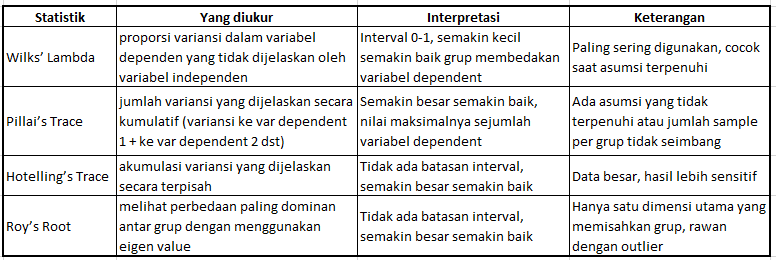

Kita bisa pilih salah 1 dari 4 statistik ini. Di case ini ke-4 statistik sama-sama menunjukkan bahwa ada perbedaan yang signifikan antar kelompok di ke-4 variabel dependent


## Uji Post Hoc

Disini kita akan melihat pasangan kelompok mana yang berbeda signifikan antar ke-3nya

In [16]:
tukey_Tingkat_Stres = pg.pairwise_tukey(data=data_trans_manova, dv='Tingkat_Stres', between='Aplikasi')
print("Tukey Post-hoc untuk variabel Tingkat_Stres")
tukey_Tingkat_Stres

Tukey Post-hoc untuk variabel Tingkat_Stres


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,Tidak Aktif Medsos,4.380447,4.124254,0.256194,0.013717,18.677542,0.000000e+00,6.275291
1,Instagram,Tiktok,4.380447,4.488133,-0.107685,0.013717,-7.850690,2.702601e-09,-2.864916
2,Tidak Aktif Medsos,Tiktok,4.124254,4.488133,-0.363879,0.013717,-26.528232,0.000000e+00,-9.752329


In [17]:
tukey_Durasi_Tidur = pg.pairwise_tukey(data=data_trans_manova, dv='Durasi_Tidur', between='Aplikasi')
print("Tukey Post-hoc untuk variabel Durasi_Tidur")
tukey_Durasi_Tidur

Tukey Post-hoc untuk variabel Durasi_Tidur


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,Tidak Aktif Medsos,1.699503,2.042615,-0.343112,0.01997,-17.180973,0.000000e+00,-7.305507
1,Instagram,Tiktok,1.699503,1.512151,0.187352,0.01997,9.381482,2.178357e-11,2.837690
2,Tidak Aktif Medsos,Tiktok,2.042615,1.512151,0.530464,0.01997,26.562455,0.000000e+00,9.826728


In [18]:
tukey_Konsentrasi_belajar = pg.pairwise_tukey(data=data_trans_manova, dv='Konsentrasi_belajar', between='Aplikasi')
print("Tukey Post-hoc untuk variabel Konsentrasi_belajar")
tukey_Konsentrasi_belajar

Tukey Post-hoc untuk variabel Konsentrasi_belajar


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Instagram,Tidak Aktif Medsos,4.167288,4.334461,-0.167173,0.022878,-7.307251,1.580576e-08,-3.955876
1,Instagram,Tiktok,4.167288,3.902760,0.264528,0.022878,11.562707,3.119727e-14,3.571860
2,Tidak Aktif Medsos,Tiktok,4.334461,3.902760,0.431701,0.022878,18.869958,0.000000e+00,6.004548


Ternyata semuanya berbeda signifikan, sekarang mari kita lihat visualisasi datanya

## Visualisasi Data

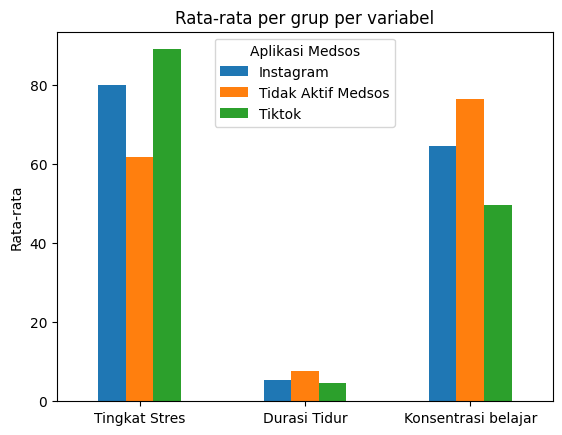

In [19]:
data_manova.groupby('Aplikasi Medsos')[['Tingkat Stres', 'Durasi Tidur', 'Konsentrasi belajar']].mean().T.plot(kind='bar')
plt.title('Rata-rata per grup per variabel')
plt.ylabel('Rata-rata')
plt.xticks(rotation=0)
plt.show()


Ternyata obat B yang paling manjur sebagai obat diet berdasarkan 3 kriteria ini